## Installation Requirements and Module Configuration

If you would like to run in your own environment, the following dependencies are required

In [32]:
## Dependencies
# !pip install azure-storage-blob

In [2]:
#to reflect changes made in modules
%load_ext autoreload
%autoreload 2

In [8]:
##imports
import pandas as pd
import os, sys
import json
sys.path.append(os.path.join(sys.path[0], '../'))

# from columbus_wildlife_workshop import Flickr
from ColumbusWildlife import Flickr
fr = Flickr() 

from image_data import Save
s = Save()

# Query Terms

Feel free to play around and modify the query term to see how your results differ :)

In [9]:
term = 'Columbus AND Ohio AND wildlife AND NOT zoo AND NOT domestic'

# Flickr API

Connect to Flickr photos search api 
API will retrieve results for term selected and download them to a zip file specified

In [10]:
json_res = fr.search(term, saveTo=True)

Retrieving Flickr Results..
<Response [200]>
12 Found with Columbus+AND+Ohio+AND+wildlife+AND+NOT+zoo+AND+NOT+domestic
Done Retrieving Flickr Results


In [11]:
print(len(json_res))
## Writing flickr results with metadata to flickr_metadata.json 
json_object = json.dumps(json_res, indent = 4) 
with open("flickr_metadata.json", "w") as outfile: 
    outfile.write(json_object) 

12


# Download Images to A Folder
In the same directory this notebook is in, create a folder "images".
This folder will contain all jpg images from the Flickr API query

Save images to a folder specied. As we save images, we build a list of dictionaries representing the images.

For each image, we construct a dictionary with:
   - url: img url from flickr
   - name: name of image
   - data: bytearray representation of img 

In [149]:
# # Test out with a small portion of images
# subset = json_res[0][0:6]
# print(subset[0]['url_l'])

# # For Species Classfier Images 
# file_path = 'subset_classifier_images/'#"classifier_images/"
# list_images = s.download_images(file_path, subset)

https://live.staticflickr.com/65535/50567923271_926d37d247_b.jpg


In [13]:
# For Species Classfier Images 
file_path = "classifier_images/"
list_images = s.download_images(file_path, json_res)

image-1.jpg
image-2.jpg
image-3.jpg
image-4.jpg
image-5.jpg
image-6.jpg
image-7.jpg
image-8.jpg
image-9.jpg
image-10.jpg
image-11.jpg
image-12.jpg
image-13.jpg
image-14.jpg
image-15.jpg
image-16.jpg
image-17.jpg
image-18.jpg
image-19.jpg
image-20.jpg
image-21.jpg
image-22.jpg
image-23.jpg
image-24.jpg
image-25.jpg
image-26.jpg
image-27.jpg
image-28.jpg
image-29.jpg
image-30.jpg
image-31.jpg
image-32.jpg
image-33.jpg
image-34.jpg
image-35.jpg
image-36.jpg
image-37.jpg
image-38.jpg
image-39.jpg
image-40.jpg
image-41.jpg
image-42.jpg
image-43.jpg
image-44.jpg
image-45.jpg
image-46.jpg
image-47.jpg
image-48.jpg
image-49.jpg
image-50.jpg
image-51.jpg
image-52.jpg
image-53.jpg
image-54.jpg
image-55.jpg
image-56.jpg
image-57.jpg
image-58.jpg
image-59.jpg
image-60.jpg
image-61.jpg
image-62.jpg
image-63.jpg
image-64.jpg
image-65.jpg
image-66.jpg
image-67.jpg
image-68.jpg
image-69.jpg
image-70.jpg
image-71.jpg
image-72.jpg
image-73.jpg
image-74.jpg
image-75.jpg
image-76.jpg
image-77.jpg
image-78

image-594.jpg
image-595.jpg
image-596.jpg
image-597.jpg
image-598.jpg
image-599.jpg
image-600.jpg
image-601.jpg
image-602.jpg
image-603.jpg
image-604.jpg
image-605.jpg
image-606.jpg
image-607.jpg
image-608.jpg
image-609.jpg
image-610.jpg
image-611.jpg
image-612.jpg
image-613.jpg
image-614.jpg
image-615.jpg
image-616.jpg
image-617.jpg
image-618.jpg
image-619.jpg
image-620.jpg
image-621.jpg
image-622.jpg
image-623.jpg
image-624.jpg
image-625.jpg
image-626.jpg
image-627.jpg
image-628.jpg
image-629.jpg
image-630.jpg
image-631.jpg
image-632.jpg
image-633.jpg
image-634.jpg
image-635.jpg
image-636.jpg
image-637.jpg
image-638.jpg
image-639.jpg
image-640.jpg
image-641.jpg
image-642.jpg
image-643.jpg
image-644.jpg
image-645.jpg
image-646.jpg
image-647.jpg
image-648.jpg
image-649.jpg
image-650.jpg
image-651.jpg
image-652.jpg
image-653.jpg
image-654.jpg
image-655.jpg
image-656.jpg
image-657.jpg
image-658.jpg
image-659.jpg
image-660.jpg
image-661.jpg
image-662.jpg
image-663.jpg
image-664.jpg
image-

# Species Classfication

In [15]:
# from columbus_wildlife_workshop import SpeciesClassifier
from ColumbusWildlife import SpeciesClassifier
cs = SpeciesClassifier()

Connect to Microsoft Azure SpeciesClassification API to generate predictions on species in frame using the photos collected from the Flickr API. Once you have a key - go to species_classifier and insert your key in get_api_headers() method

Note: To run the following code, you'll need to request an API key for the Species Classification API
For more info on doing so, visit
https://docs.microsoft.com/en-us/azure/architecture/solution-ideas/articles/ai-for-earth 

please note that the following code only outputs the visuals of the predictions generated by the API, but does not 
save the results to any data structure or file for future use. Instead, we do so while building a dictionary object 
representing each image in the ground truths section. 

This Species Classification section is to help you understand the output format of the predictions results we receive

In [16]:
# get list of image dicts
image_data = list_images
print(type(image_data))

<class 'list'>


In [17]:
#visualize a small subset of our images being run through the classifier
i = 1
for image in image_data[0:3]:
    print("Image {}/{} ...".format(i, len(image_data)))
    cs.classify_and_display_results(image) ##uncomment to visualize each result
#     result = cs.get_api_response(image['data']) #to just get predictions generated
    i+=1

Image 1/1103 ...


result:  ({'statusCode': 401, 'message': 'Access denied due to invalid subscription key. Make sure to provide a valid key for an active subscription.'}, True)


KeyError: 'predictions'

### Building a dataframe for image data
- img name
- species prediction (we store the most confident one, which is the first item in 'predictions' return value
- true species

In [437]:
conf_threshold = 20.0 #change this to reflect the level of confidence you want to accept from predicted results
predictions = []
json_predictions = {} 
image_data_json = {}
print('running API...')
for image in image_data:
    result = cs.get_api_response(image['data'])
    if result[0]['predictions'][0]['confidence'] > conf_threshold:
        pred = {'image': image['name'],
                'image_url': image['url'],
                'species_prediction': result[0]['predictions'][0]['species_common'],
                'true_species': None,
               }
        predictions.append(pred)

        #to use in saving prediction result return by get_api_response() to json file
        #each result returned by get_api_response is a tuple so unpack accordingly
        json_predictions[image['url']] = result[0]

        #to use in saving each built image document to a json file as well
        image_data_json[image['name']] = pred 

In [484]:
## quick checks - should be the same size
print(len(json_predictions))
print(len(image_data_json))

670
670


In [439]:
## Writing prediction results from classifier to image_prediction_results.json 
json_object = json.dumps(json_predictions, indent = 4) 
with open("image_prediction_results.json", "w") as outfile: 
    outfile.write(json_object) 

In [440]:
## Writing to image dictionaries to image_data.json 
json_object = json.dumps(image_data_json, indent = 4)  
with open("image_data.json", "w") as outfile: 
    outfile.write(json_object) 

After this point, we work with a subset of 100 our flickr images as we manually filter and analyze our results

In [443]:
df = pd.DataFrame(predictions[0:100])
df #df does not contain ground truths yet

,image,image_url,species_prediction,true_species,native_to_ohio
0,image-1.jpg,https://live.staticflickr.com/65535/5056792327...,Belted Kingfisher,None,None
1,image-3.jpg,https://live.staticflickr.com/65535/5056146831...,Columbian Black tailed Deer,None,None
2,image-5.jpg,https://live.staticflickr.com/65535/5054391470...,Northern Cardinal,None,None
3,image-6.jpg,https://live.staticflickr.com/65535/5052553194...,Blue gray Gnatcatcher,None,None
4,image-17.jpg,https://live.staticflickr.com/65535/5052406962...,White faced Heron,None,None
...,...,...,...,...,...
95,image-135.jpg,https://live.staticflickr.com/1839/44092153191...,Human,None,None
96,image-136.jpg,https://live.staticflickr.com/1835/43185452615...,Human,None,None
97,image-137.jpg,https://live.staticflickr.com/1817/43373079454...,Human,None,None
98,image-138.jpg,https://live.staticflickr.com/935/43058563604_...,Eastern Gray Squirrel,None,None


# Ground Truths of Species for All Images Collected

## Manually Filter Images
We manually filter our images and assign their true species from what we (the people) see.
Process: 
- Go through each image, and to make the process faster, print the species_prediction and double check
  with a quick web_search
- Insert true_species value to dataframe directly

In [1]:
#iterate through each row in df to get ground truths

''' Labels to use for the following cases:
    'Irrelevant' - no live wildlife species detected
    'Human' - human in image
    'Not enough info' - hard to tell what kind of species the animal was 
'''

for index, row in df.iterrows():
    true_species = cs.get_ground_truth(row['image_url'], row['species_prediction'])
    df.iloc[index]['true_species'] = true_species
    

In [453]:
#make sure all classes are all uppercase to compare easily
df.species_prediction = df.species_prediction.str.upper()
df.true_species = df.true_species.str.upper()

df #dataframe after manual filtration (true_species now has values)

,image,image_url,species_prediction,true_species,native_to_ohio
0,image-1.jpg,https://live.staticflickr.com/65535/5056792327...,BELTED KINGFISHER,BELTED KINGFISHER,None
1,image-3.jpg,https://live.staticflickr.com/65535/5056146831...,COLUMBIAN BLACK TAILED DEER,COLUMBIAN BLACK TAILED DEER,None
2,image-5.jpg,https://live.staticflickr.com/65535/5054391470...,NORTHERN CARDINAL,NORTHERN CARDINAL,None
3,image-6.jpg,https://live.staticflickr.com/65535/5052553194...,BLUE GRAY GNATCATCHER,BLUE GRAY GNATCATCHER,None
4,image-17.jpg,https://live.staticflickr.com/65535/5052406962...,WHITE FACED HERON,IRRELEVANT,None
...,...,...,...,...,...
95,image-135.jpg,https://live.staticflickr.com/1839/44092153191...,HUMAN,HUMAN,None
96,image-136.jpg,https://live.staticflickr.com/1835/43185452615...,HUMAN,HUMAN,None
97,image-137.jpg,https://live.staticflickr.com/1817/43373079454...,HUMAN,HUMAN,None
98,image-138.jpg,https://live.staticflickr.com/935/43058563604_...,EASTERN GRAY SQUIRREL,EASTERN GRAY SQUIRREL,None


In [454]:
## save dataframe with manual filtration results and species prediction to a csv file
compression_opts = dict(method='zip',archive_name='classifier_results.csv')  
df.to_csv('classifier_results.zip', index=False,compression=compression_opts)

# Analyzing Our Results

Here, we'll take a look at how well the species classifier predicted the species in our Flickr Image Data
- analyze the different species we detected and their frequencies (correctly identified species) (histogram)
- analyze the predicted class and actual classes via a confusion matrix

## Load Stored Results Into DataFrame
Run the following cell if you just want to see the results of the data after being run through the classifier 
and being manually filtered for ground truths

In [18]:
# load CSV of our dataframe with predictions and ground truths 
# into a dataframe so we don't have to filter images again
df = pd.read_csv('classifier_results.csv')
df

,image,image_url,species_prediction,true_species
0,image-1.jpg,https://live.staticflickr.com/65535/5056792327...,BELTED KINGFISHER,BELTED KINGFISHER
1,image-3.jpg,https://live.staticflickr.com/65535/5056146831...,COLUMBIAN BLACK TAILED DEER,COLUMBIAN BLACK TAILED DEER
2,image-5.jpg,https://live.staticflickr.com/65535/5054391470...,NORTHERN CARDINAL,NORTHERN CARDINAL
3,image-6.jpg,https://live.staticflickr.com/65535/5052553194...,BLUE GRAY GNATCATCHER,BLUE GRAY GNATCATCHER
4,image-17.jpg,https://live.staticflickr.com/65535/5052406962...,WHITE FACED HERON,IRRELEVANT
...,...,...,...,...
95,image-135.jpg,https://live.staticflickr.com/1839/44092153191...,HUMAN,HUMAN
96,image-136.jpg,https://live.staticflickr.com/1835/43185452615...,HUMAN,HUMAN
97,image-137.jpg,https://live.staticflickr.com/1817/43373079454...,HUMAN,HUMAN
98,image-138.jpg,https://live.staticflickr.com/935/43058563604_...,EASTERN GRAY SQUIRREL,EASTERN GRAY SQUIRREL


In [19]:
## Map each type of species to a value so that we are able to generate 
## a correct multiclass confusion matrix for our data
all_species = df.species_prediction.tolist() + df.true_species.tolist()
species_map = {}
i = 0
for species in all_species:
    if species not in species_map.keys():
        species_map[species] = i
        i+=1
    
##then convert out species_prediction column to the codes
y_pred = [species_map[species] for species in df.species_prediction.tolist()]

##finally, convert our true_species column to the codes
y_true = [species_map[species] for species in df.true_species.tolist()]

In [20]:
# show the map of our species labels to their integer representations
table_identifiers = pd.DataFrame({'Species/Label': list(species_map.keys()),
                                   'Assigned Numerical Representation': list(species_map.values())})
print(table_identifiers)
# print(species_map)

                         Species/Label  Assigned Numerical Representation
0                    BELTED KINGFISHER                                  0
1          COLUMBIAN BLACK TAILED DEER                                  1
2                    NORTHERN CARDINAL                                  2
3                BLUE GRAY GNATCATCHER                                  3
4                    WHITE FACED HERON                                  4
5                     BLACK COTTONWOOD                                  5
6                           BARRED OWL                                  6
7                          BLUE DASHER                                  7
8                     GREAT BLUE HERON                                  8
9                      RED TAILED HAWK                                  9
10                   GREEN LYNX SPIDER                                 10
11               EASTERN GRAY SQUIRREL                                 11
12                  EASTERN COTTONTAIL

### Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_true[0:30], y_pred[0:30]) #for better visibility, we plot the results of first 30 entries from df

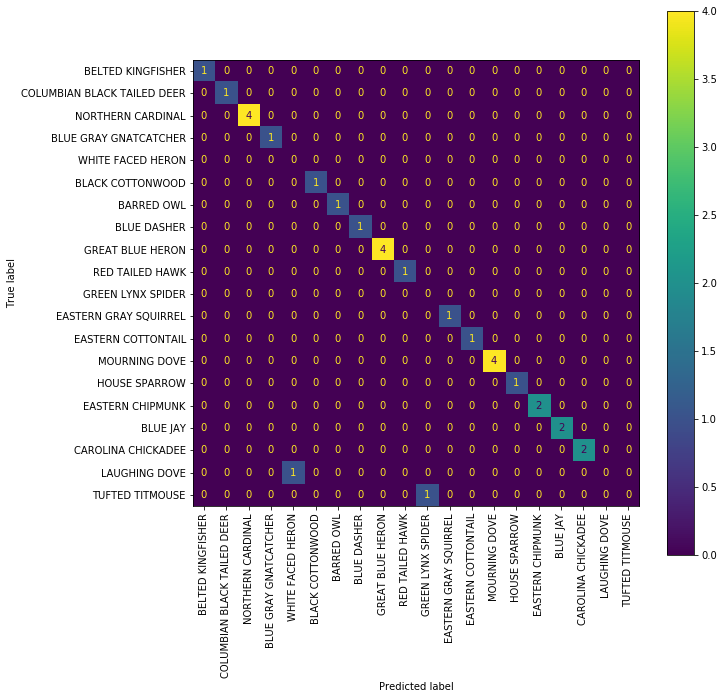

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import *
import matplotlib.pyplot as plt
fig, disp_ax = plt.subplots(figsize=(10, 10))

## display confusion matrix without the classifier
disp = ConfusionMatrixDisplay(cf, display_labels=table_identifiers['Species/Label'][0:30])
disp = disp.plot(xticks_rotation = 'vertical', ax = disp_ax)

## Generate a histogram of frequencies of (true) species labels seen

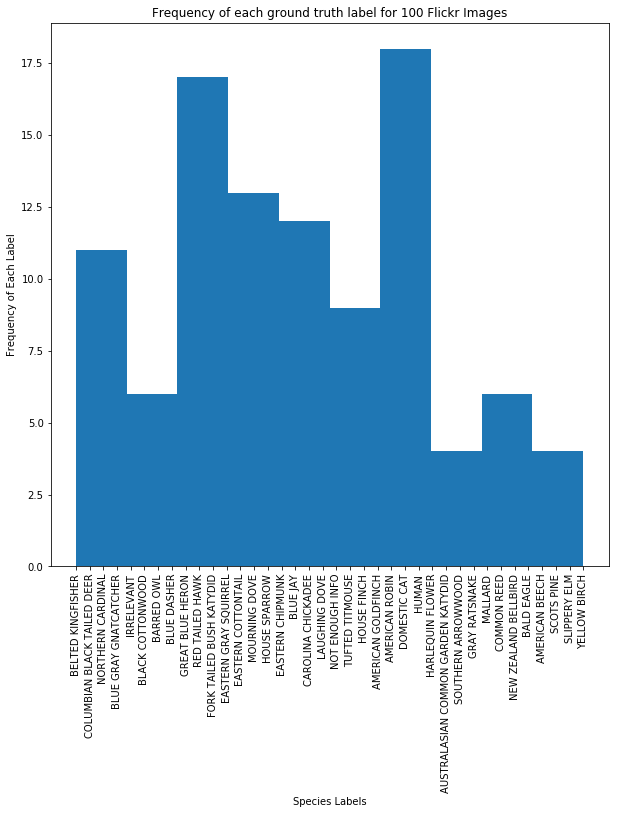

In [29]:
fig, disp_ax = plt.subplots(figsize=(10, 10))
plt.hist(df.true_species.tolist())
plt.xticks(rotation = 'vertical')
plt.title('Frequency of each ground truth label for {} Flickr Images'.format(len(df)))
plt.xlabel('Species Labels')
plt.ylabel('Frequency of Each Label');

Matplot Troubleshooting
- in case the confusion matrix is not displaying, here are a few tips to help you troubleshoot, otherwise ignore this following cell

In [23]:
# Note: if confusion matrix plot does not show up, reference:
# https://stackoverflow.com/questions/7534453/matplotlib-does-not-show-my-drawings-although-i-call-pyplot-show

# To get plot to show up, you will have to find the matplotlibrc
# file and edit the backend setting

# The following code is helpful in locating where matplotlibrc
# file is located, but you must find the file yourself and set:
# 'backup: GtkAgg' 
import matplotlib.rcsetup as rcsetup
print(rcsetup.all_backends)

import matplotlib
matplotlib.matplotlib_fname()

['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg', 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']


'/home/ekidane/.local/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'